In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Prepo 1 (Visualisasi)
import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Score
from sklearn.metrics import accuracy_score, make_scorer


## atas

In [2]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [4]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [6]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [7]:
# Membuang feature 'Mobile_phone' karena hanya memiliki satu nilai
data = data.drop(columns=['Mobile_phone'])

In [8]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# # Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0      0.942     0.986     0.963       280
           1      0.765     0.433     0.553        30

    accuracy                          0.932       310
   macro avg      0.853     0.710     0.758       310
weighted avg      0.925     0.932     0.924       310



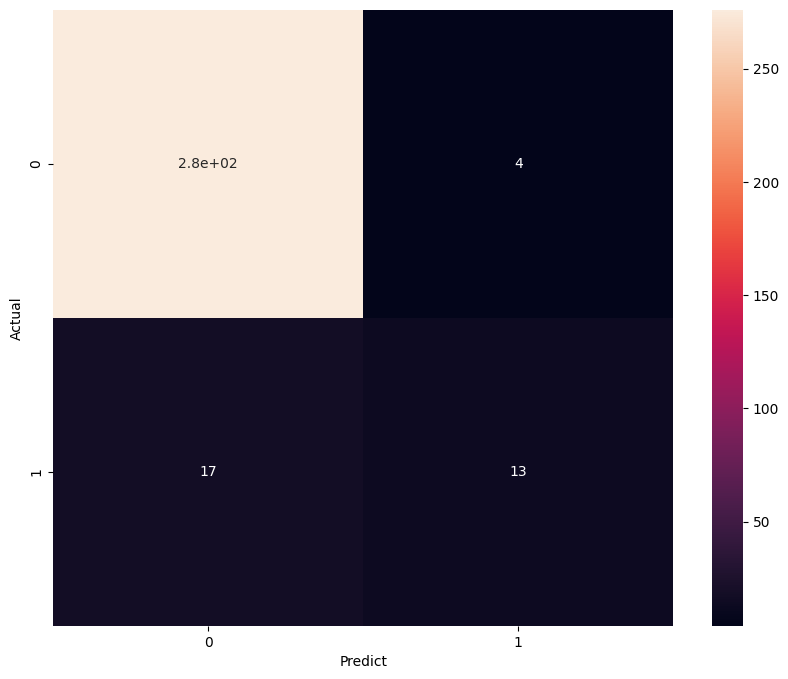

In [10]:
best = BalancedRandomForestClassifier(random_state=0, class_weight = 'balanced_subsample', verbose=0)
best.fit(X_train_resampled, y_train_resampled)
Y_pred = best.predict(X_test_processed)

print(classification_report(y_test, Y_pred, digits=3))
# hapus marital status

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Learning rate set to 0.014359
0:	learn: 0.6879669	total: 197ms	remaining: 3m 17s
1:	learn: 0.6828849	total: 246ms	remaining: 2m 2s
2:	learn: 0.6772115	total: 285ms	remaining: 1m 34s
3:	learn: 0.6703376	total: 383ms	remaining: 1m 35s
4:	learn: 0.6649832	total: 405ms	remaining: 1m 20s
5:	learn: 0.6566581	total: 501ms	remaining: 1m 22s
6:	learn: 0.6540477	total: 569ms	remaining: 1m 20s
7:	learn: 0.6497286	total: 726ms	remaining: 1m 30s
8:	learn: 0.6469729	total: 828ms	remaining: 1m 31s
9:	learn: 0.6425786	total: 939ms	remaining: 1m 32s
10:	learn: 0.6388357	total: 1.01s	remaining: 1m 30s
11:	learn: 0.6340004	total: 1.15s	remaining: 1m 34s
12:	learn: 0.6290817	total: 1.24s	remaining: 1m 34s
13:	learn: 0.6259214	total: 1.29s	remaining: 1m 31s
14:	learn: 0.6237560	total: 1.37s	remaining: 1m 30s
15:	learn: 0.6199858	total: 1.45s	remaining: 1m 29s
16:	learn: 0.6148498	total: 1.52s	remaining: 1m 27s
17:	learn: 0.6107463	total: 1.61s	remaining: 1m 28s
18:	learn: 0.6087534	total: 1.71s	remaining: 

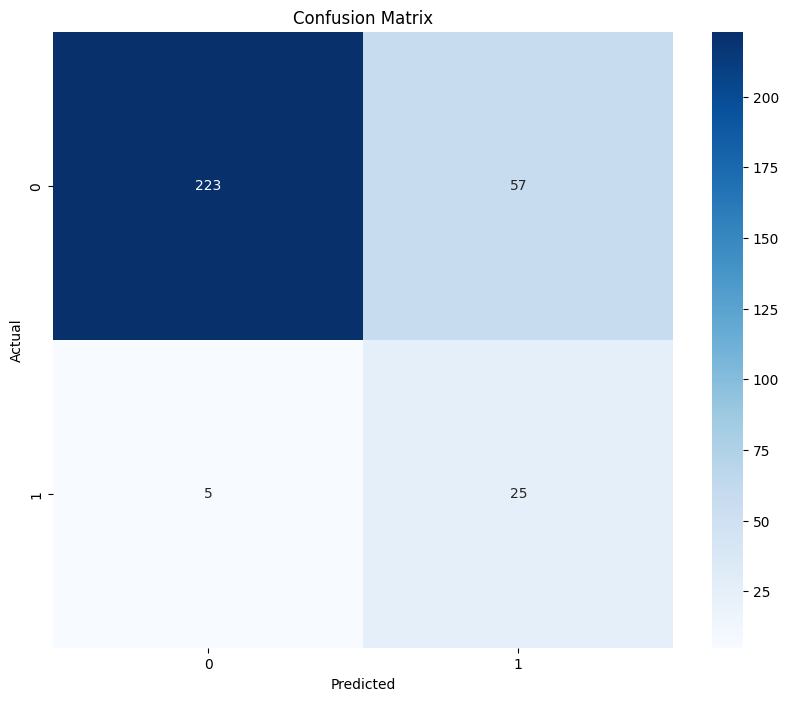

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns


# # Oversample the training data using ADASYN
# oversampler = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Train the Gradient Boosting model
model = CatBoostClassifier(random_state=0)
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

# Calculate specificity (1 - FPR)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

# Find the threshold that gives the best geometric mean
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using the optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred, digits=3))

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0      0.950     0.818     0.879       280
           1      0.261     0.600     0.364        30

    accuracy                          0.797       310
   macro avg      0.606     0.709     0.621       310
weighted avg      0.883     0.797     0.829       310



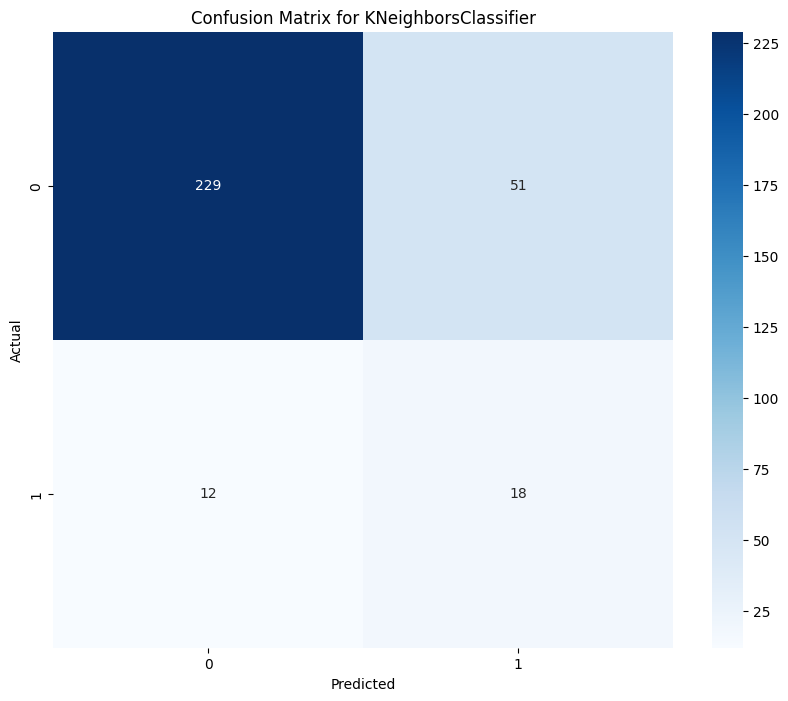

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.963     0.836     0.895       280
           1      0.313     0.700     0.433        30

    accuracy                          0.823       310
   macro avg      0.638     0.768     0.664       310
weighted avg      0.900     0.823     0.850       310



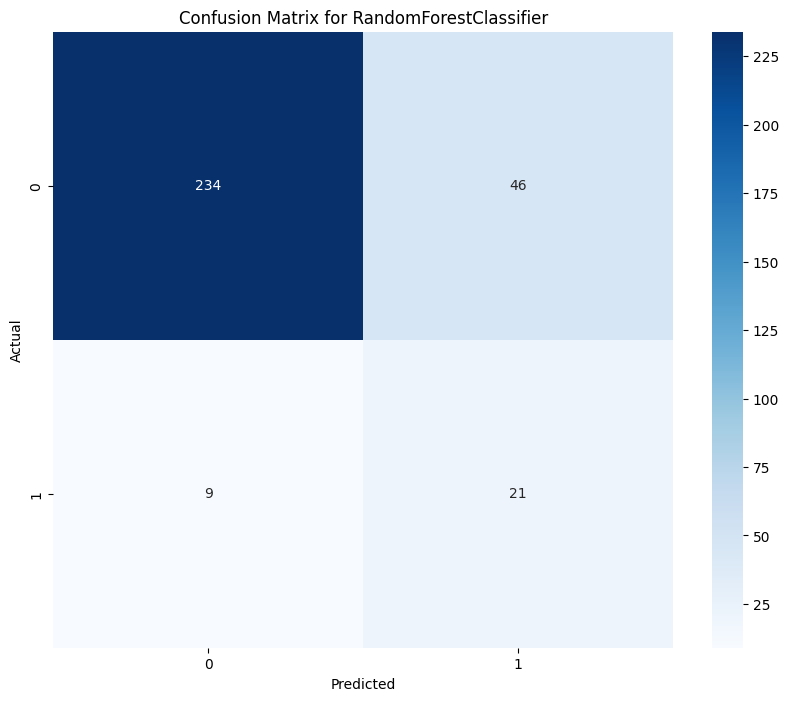

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      0.981     0.732     0.838       280
           1      0.257     0.867     0.397        30

    accuracy                          0.745       310
   macro avg      0.619     0.799     0.618       310
weighted avg      0.911     0.745     0.796       310



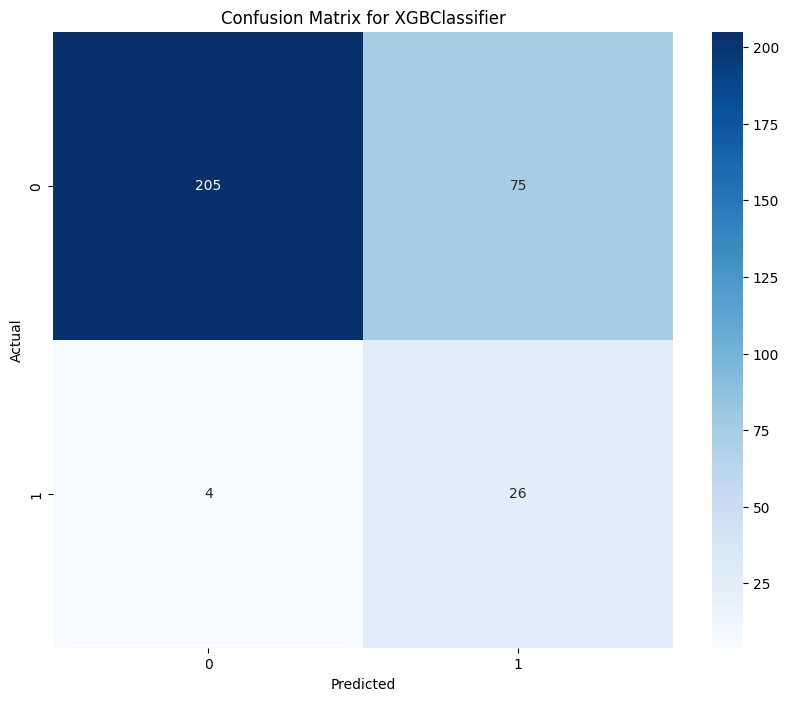

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
}

# Function to evaluate each model
def evaluate_model(model, X_test_processed, y_test):
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test_processed)[:, 1]

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_test_processed, y_test)

# Utility function for geometric mean
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Best ROC AUC Score: 0.9847622941150179
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      0.969     0.782     0.866       280
           1      0.274     0.767     0.404        30

    accuracy                          0.781       310
   macro avg      0.621     0.774     0.635       310
weighted avg      0.902     0.781     0.821       310



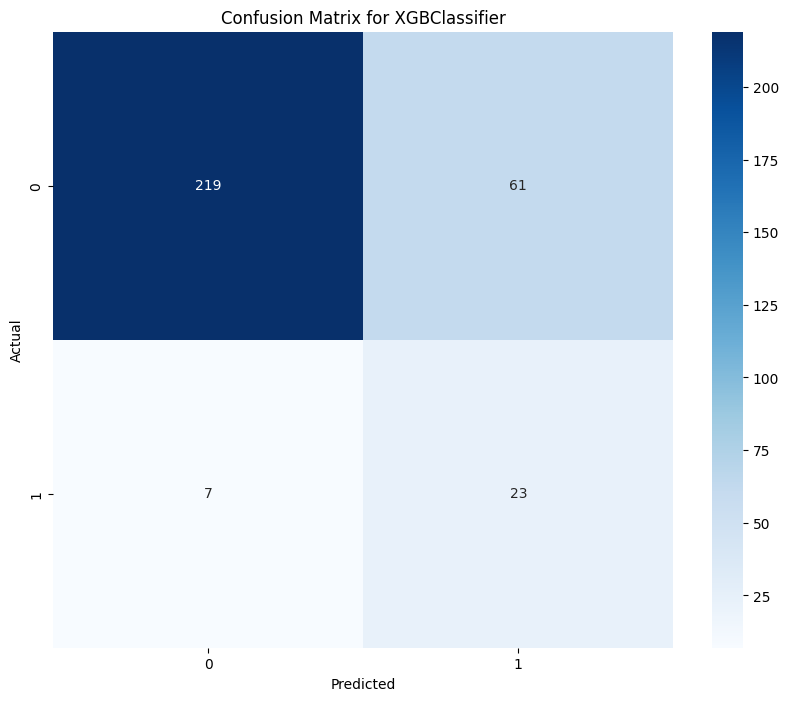

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_xgb = grid_search.best_estimator_
evaluate_model(best_xgb, X_test_processed, y_test)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC AUC Score for Random Forest: 0.9878372552821304
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.960     0.861     0.908       280
           1      0.339     0.667     0.449        30

    accuracy                          0.842       310
   macro avg      0.650     0.764     0.679       310
weighted avg      0.900     0.842     0.863       310



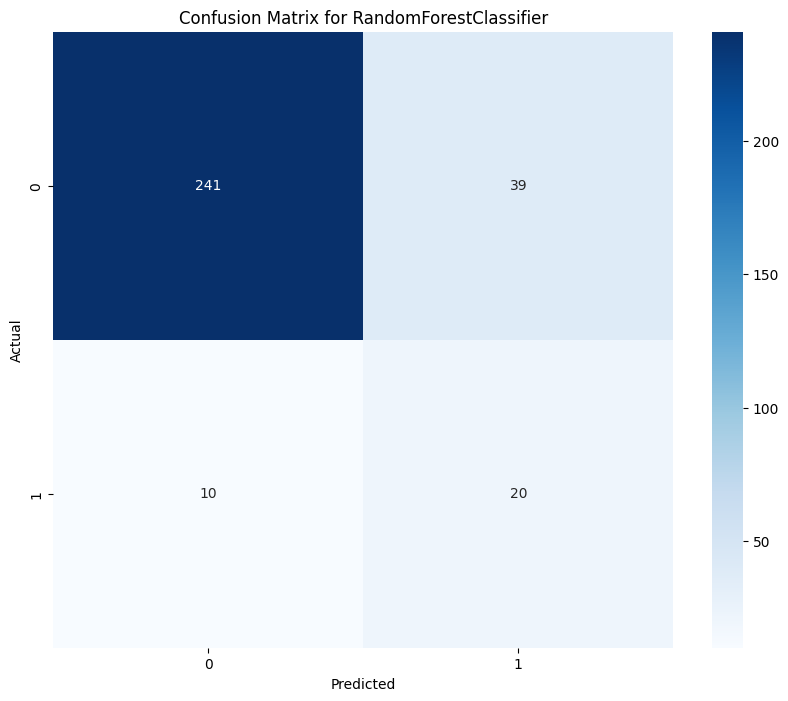

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC Score for Random Forest: {grid_search_rf.best_score_}")

# Use the best estimator to make predictions
best_rf = grid_search_rf.best_estimator_
evaluate_model(best_rf, X_test_processed, y_test)


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0      0.950     0.818     0.879       280
           1      0.261     0.600     0.364        30

    accuracy                          0.797       310
   macro avg      0.606     0.709     0.621       310
weighted avg      0.883     0.797     0.829       310



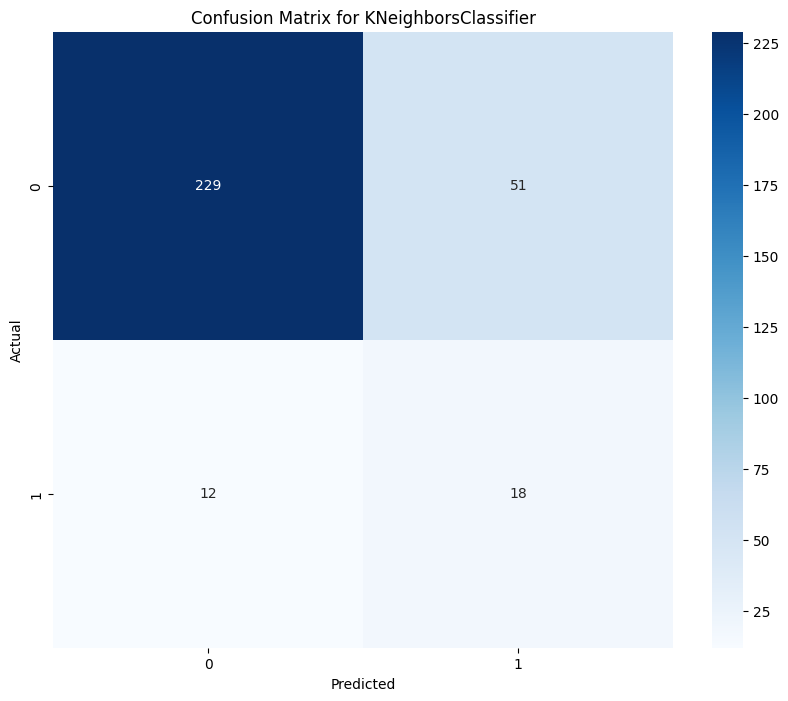

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.963     0.836     0.895       280
           1      0.313     0.700     0.433        30

    accuracy                          0.823       310
   macro avg      0.638     0.768     0.664       310
weighted avg      0.900     0.823     0.850       310



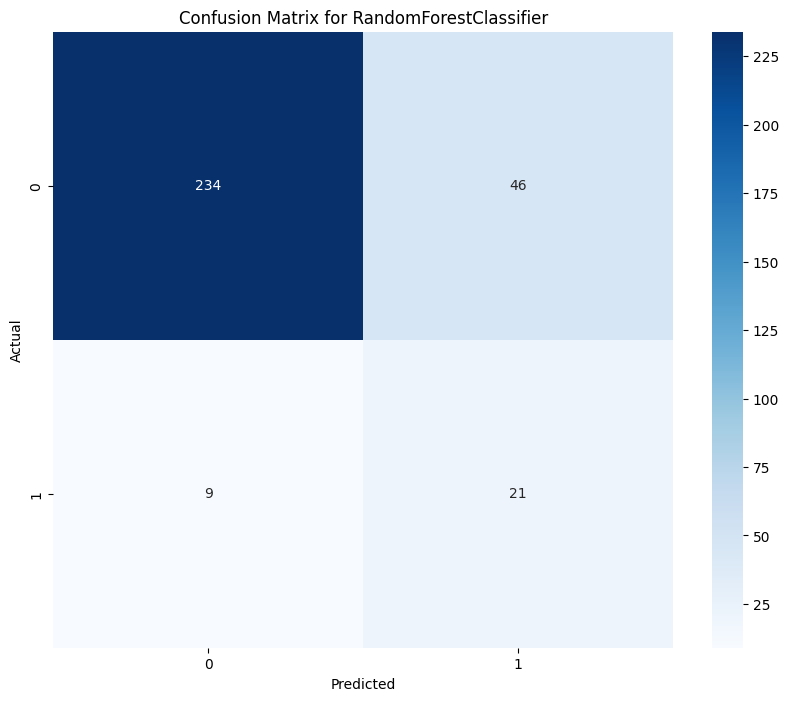

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      0.981     0.732     0.838       280
           1      0.257     0.867     0.397        30

    accuracy                          0.745       310
   macro avg      0.619     0.799     0.618       310
weighted avg      0.911     0.745     0.796       310



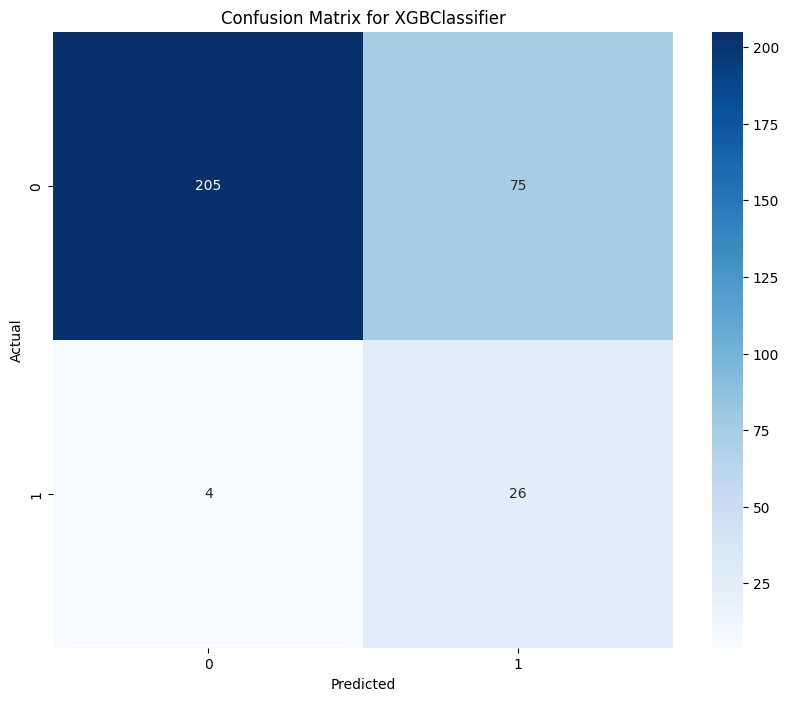

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0      0.946     0.882     0.913       280
           1      0.327     0.533     0.405        30

    accuracy                          0.848       310
   macro avg      0.636     0.708     0.659       310
weighted avg      0.886     0.848     0.864       310



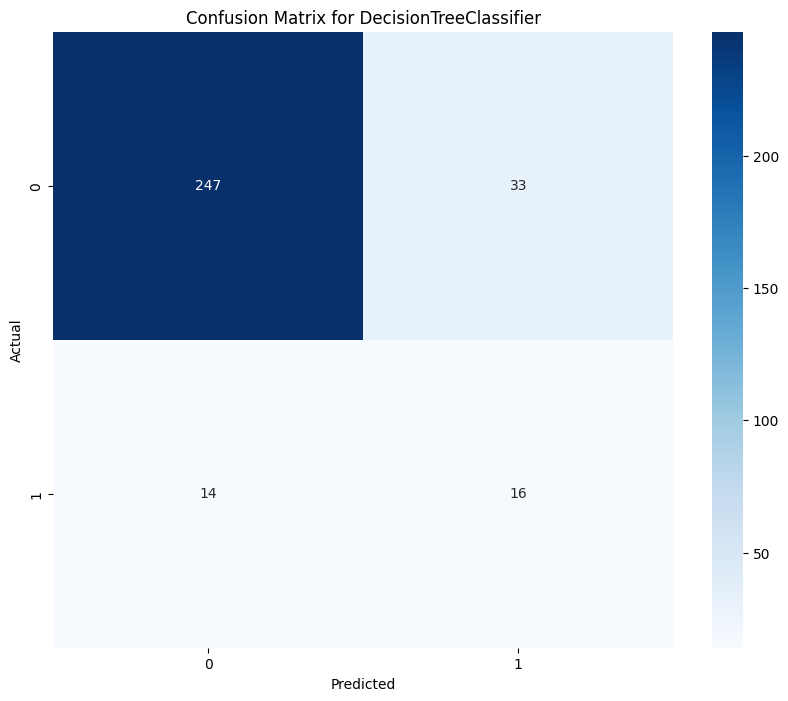

Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0      0.953     0.932     0.942       280
           1      0.472     0.567     0.515        30

    accuracy                          0.897       310
   macro avg      0.712     0.749     0.729       310
weighted avg      0.906     0.897     0.901       310



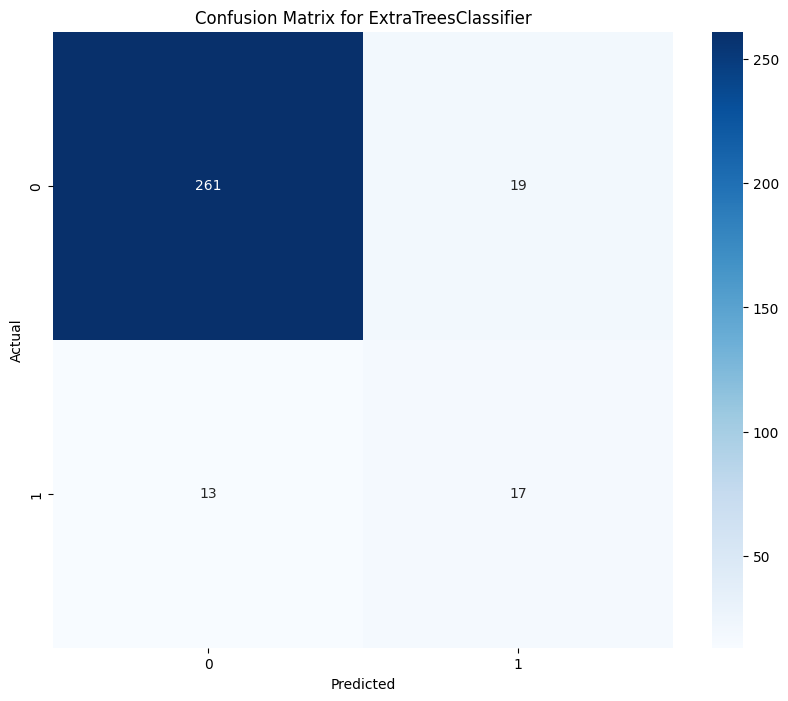

Classification Report for BaggingClassifier:
              precision    recall  f1-score   support

           0      0.970     0.807     0.881       280
           1      0.299     0.767     0.430        30

    accuracy                          0.803       310
   macro avg      0.634     0.787     0.655       310
weighted avg      0.905     0.803     0.837       310



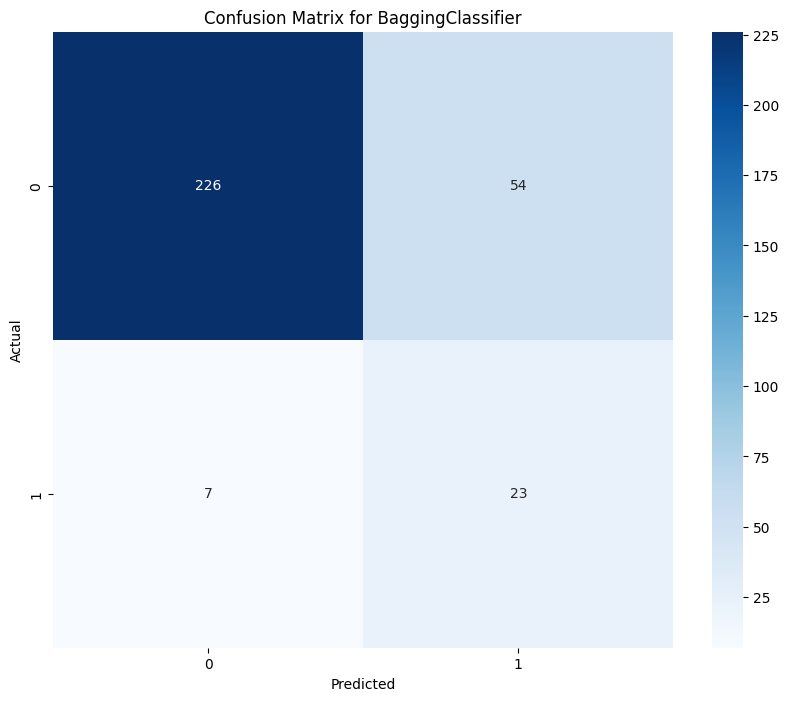

Classification Report for SVC:
              precision    recall  f1-score   support

           0      0.953     0.789     0.863       280
           1      0.244     0.633     0.352        30

    accuracy                          0.774       310
   macro avg      0.598     0.711     0.608       310
weighted avg      0.884     0.774     0.814       310



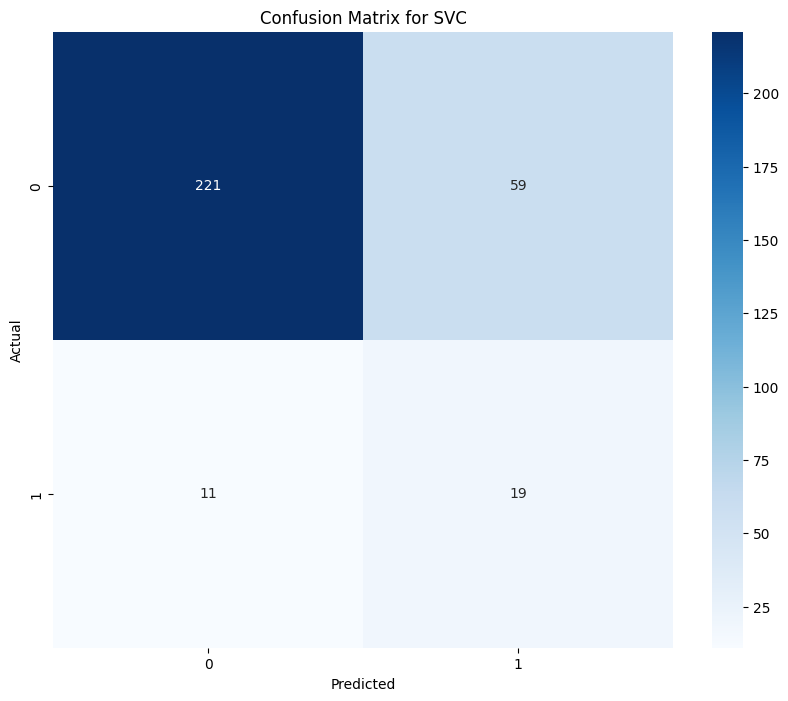

[LightGBM] [Info] Number of positive: 1083, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 2176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497702 -> initscore=-0.009191
[LightGBM] [Info] Start training from score -0.009191
Classification Report for LGBMClassifier:
              precision    recall  f1-score   support

           0      0.971     0.829     0.894       280
           1      0.324     0.767     0.455        30

    accuracy                          0.823       310
   macro avg      0.647     0.798     0.675       310
weighted avg      0.908     0.823     0.852       310



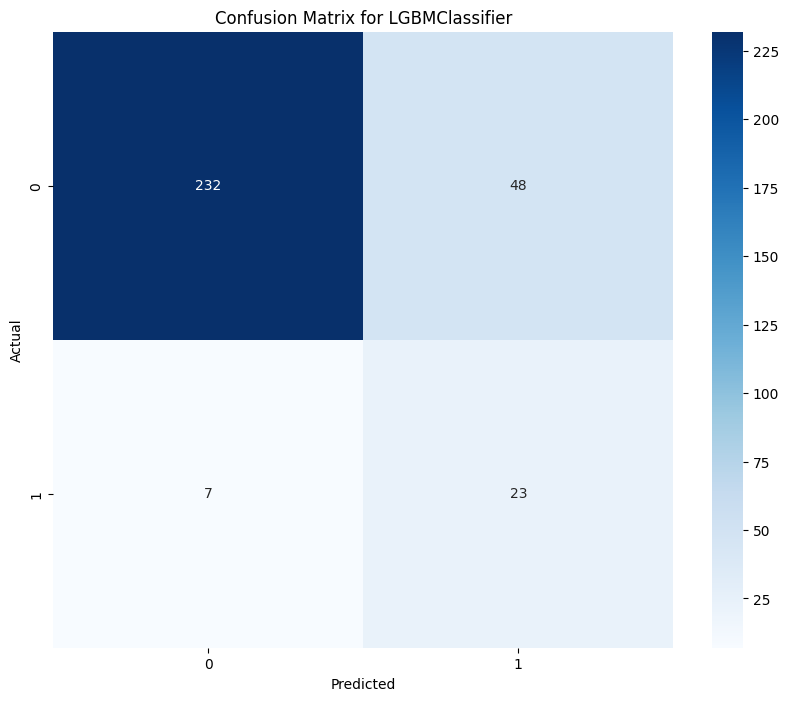

Classification Report for CatBoostClassifier:
              precision    recall  f1-score   support

           0      0.978     0.796     0.878       280
           1      0.305     0.833     0.446        30

    accuracy                          0.800       310
   macro avg      0.641     0.815     0.662       310
weighted avg      0.913     0.800     0.836       310



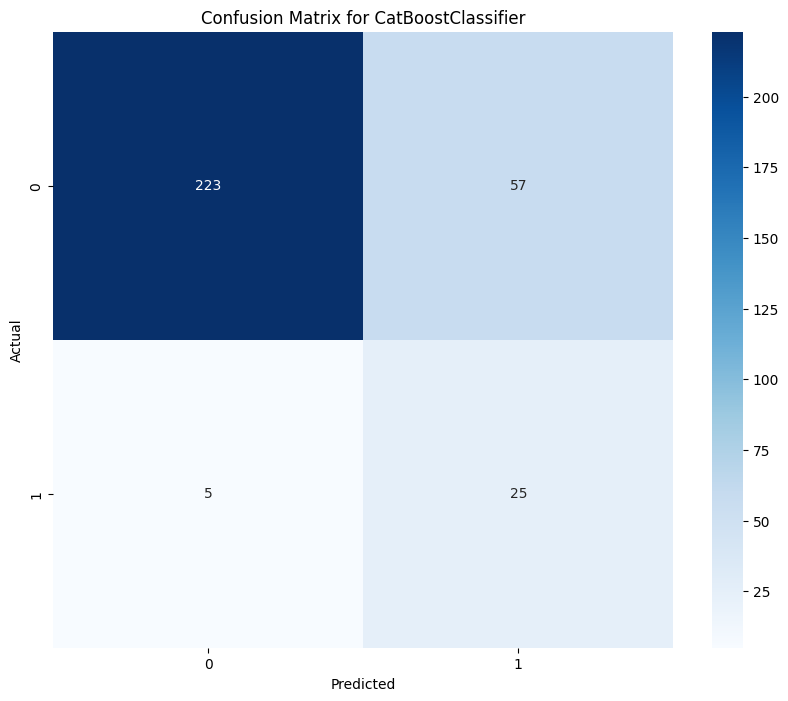

Classification Report for DummyClassifier:
              precision    recall  f1-score   support

           0      0.903     1.000     0.949       280
           1      0.000     0.000     0.000        30

    accuracy                          0.903       310
   macro avg      0.452     0.500     0.475       310
weighted avg      0.816     0.903     0.857       310



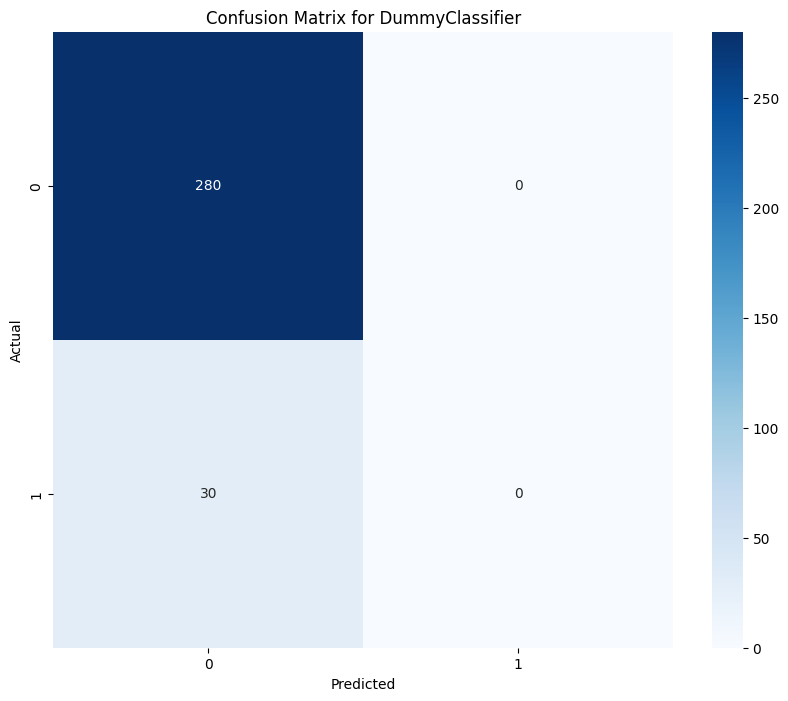

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Extra Trees": ExtraTreesClassifier(random_state=0),
    "Bagging Classifier": BaggingClassifier(random_state=0),
    "Support Vector Classifier": SVC(probability=True, random_state=0),
    "LightGBM": LGBMClassifier(random_state=0),
    "CatBoost": CatBoostClassifier(random_state=0, silent=True),
    "Dummy Classifier": DummyClassifier(strategy='most_frequent')
}

# Function to evaluate each model
def evaluate_model(model, X_test_processed, y_test):
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test_processed)[:, 1]

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_test_processed, y_test)


## Batas Suci

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GENDER           1541 non-null   object  
 1   Car_Owner        1548 non-null   object  
 2   Propert_Owner    1548 non-null   object  
 3   CHILDREN         1548 non-null   int64   
 4   Annual_income    1525 non-null   float64 
 5   Type_Income      1548 non-null   object  
 6   EDUCATION        1548 non-null   object  
 7   Marital_status   1548 non-null   object  
 8   Housing_type     1548 non-null   object  
 9   Birthday_count   1526 non-null   float64 
 10  Employed_days    1548 non-null   int64   
 11  Mobile_phone     1548 non-null   category
 12  Work_Phone       1548 non-null   category
 13  Phone            1548 non-null   category
 14  EMAIL_ID         1548 non-null   category
 15  Type_Occupation  1060 non-null   object  
 16  Family_Members   1548 non-null   int64   


In [39]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [64]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [65]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [66]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [70]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed']
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Check that categorical features are correctly identified
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Continue with model training and evaluation

Numeric Features: ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members', 'Years_Employed', 'Income_per_Family_Member', 'Children_per_Family_Member']
Categorical Features: ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Age_Group']


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0      0.951     0.836     0.890       280
           1      0.281     0.600     0.383        30

    accuracy                          0.813       310
   macro avg      0.616     0.718     0.636       310
weighted avg      0.886     0.813     0.841       310



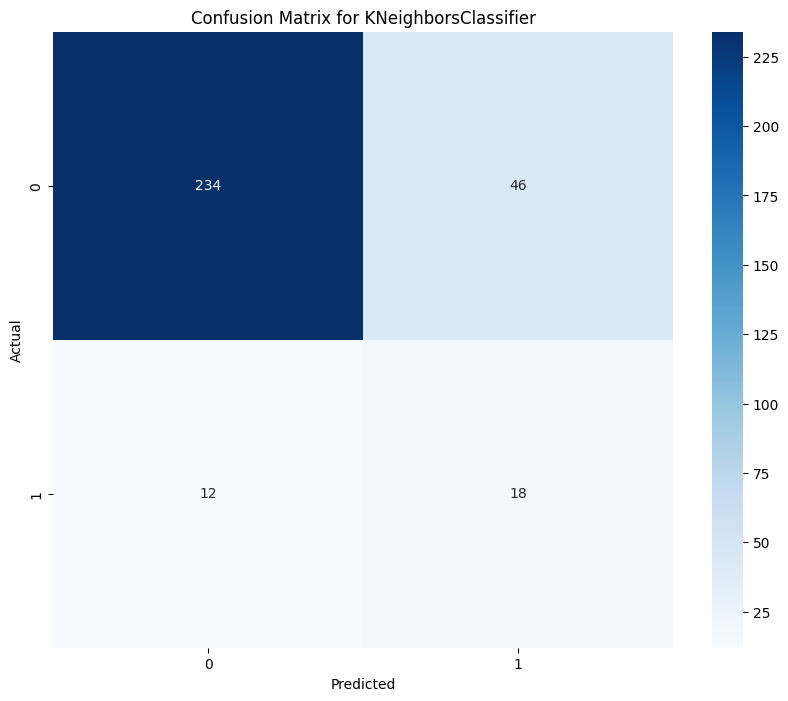

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.966     0.800     0.875       280
           1      0.282     0.733     0.407        30

    accuracy                          0.794       310
   macro avg      0.624     0.767     0.641       310
weighted avg      0.899     0.794     0.830       310



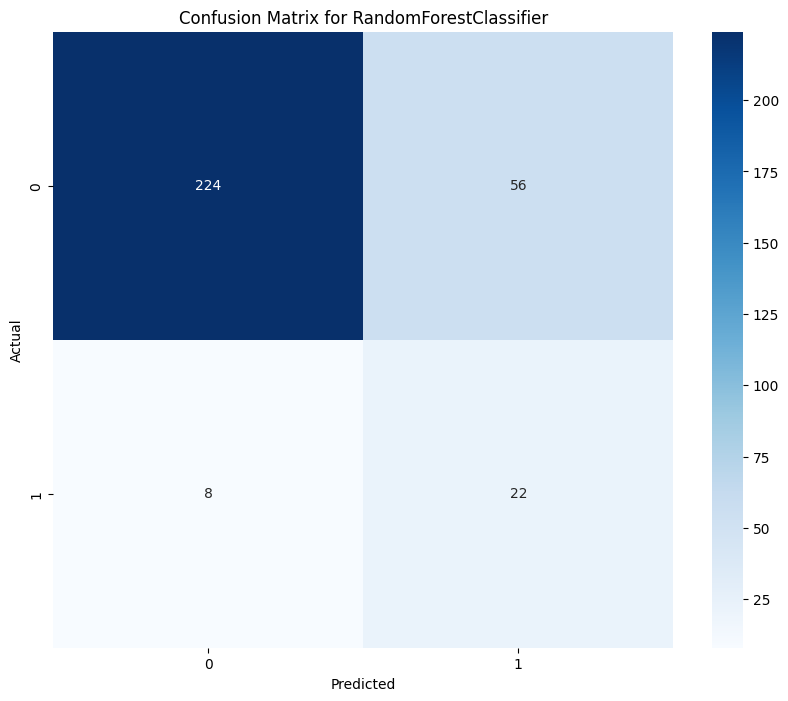

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      0.972     0.854     0.909       280
           1      0.359     0.767     0.489        30

    accuracy                          0.845       310
   macro avg      0.665     0.810     0.699       310
weighted avg      0.912     0.845     0.868       310



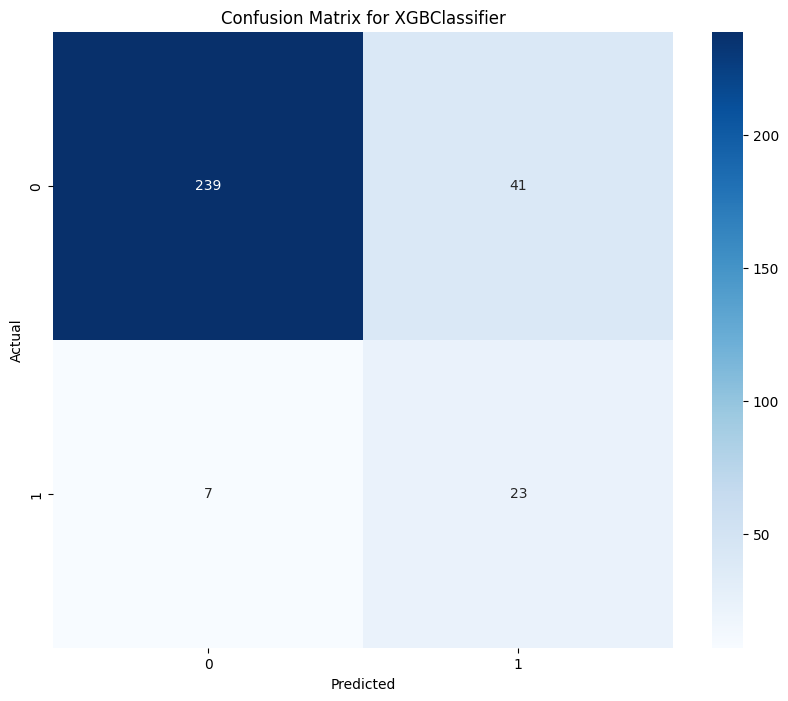

In [71]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
}

# Function to evaluate each model
def evaluate_model(model, X_test_processed, y_test):
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test_processed)[:, 1]

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_test_processed, y_test)

# Utility function for geometric mean
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)


In [15]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,...,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Years_Employed,Income_per_Family_Member,Children_per_Family_Member,Is_Employed,Age_Group
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,...,0,0,NaN,2,1,1000,90000.0,0.0,True,<18
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,...,1,0,NaN,2,1,-2,157500.0,0.0,False,<18
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,...,1,0,NaN,2,1,-2,157500.0,0.0,False,NaN
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,...,1,0,NaN,2,1,-2,NaN,0.0,False,<18
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,...,1,0,NaN,2,1,-2,157500.0,0.0,False,<18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,...,0,0,Managers,2,0,-6,NaN,0.0,False,<18
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,...,0,0,Accountants,1,0,-4,225000.0,0.0,False,<18
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,...,0,0,Managers,4,0,-7,45000.0,0.5,False,<18
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,...,1,0,Drivers,2,0,-2,135000.0,0.0,False,<18


In [14]:
#  want to know unique value for each category data
for col in data.select_dtypes(include=['object', 'category']):
    print(f"Unique values for {col}: {data[col].unique()}")

Unique values for GENDER: ['M' 'F' nan]
Unique values for Car_Owner: ['Y' 'N']
Unique values for Propert_Owner: ['Y' 'N']
Unique values for Type_Income: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Unique values for EDUCATION: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Unique values for Marital_status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique values for Housing_type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Unique values for Work_Phone: [0, 1]
Categories (2, int64): [0, 1]
Unique values for Phone: [0, 1]
Categories (2, int64): [0, 1]
Unique values for EMAIL_ID: [0, 1]
Categories (2, int64): [0, 1]
Unique values for Type_Occupation: [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT 